In [2]:
print("Jesus is lord of all who ever believes in him will have eternal life")

Jesus is lord of all who ever believes in him will have eternal life


In [7]:
#importing the  requires laibraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/Zomato-data-.csv")

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [ ]:
#sample data visualization 
df.head(5)
df.tail()
df.sample(10)


In [ ]:
#data cleaning and preparation 
#1.removing denominators from the column called rate

def handle(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)
df["rate"] = df["rate"].apply(handle)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\HP\AppData\Local\Temp\ipykernel_14132\1836802219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="listed_in(type)",hue=None, data=df,palette=colors)
C:\Users\HP\AppData\Local\Temp\ipykernel_14132\1836802219.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(x="listed_in(type)",hue=None, data=df,palette=colors)


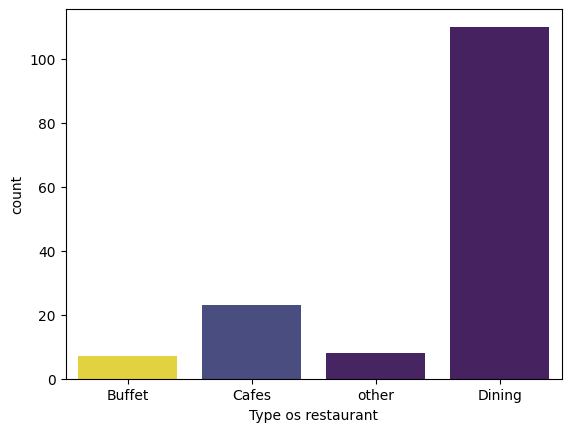

In [35]:
#continued data cleaning and preparation
#2.check for missing or null  values
df.isnull().sum()
counts = df['listed_in(type)'].value_counts()
colors = plt.cm.viridis(counts / counts.max())
sns.countplot(x="listed_in(type)",hue=None, data=df,palette=colors)
plt.xlabel("Type os restaurant")
plt.show()



Text(0, 0.5, 'Votes')

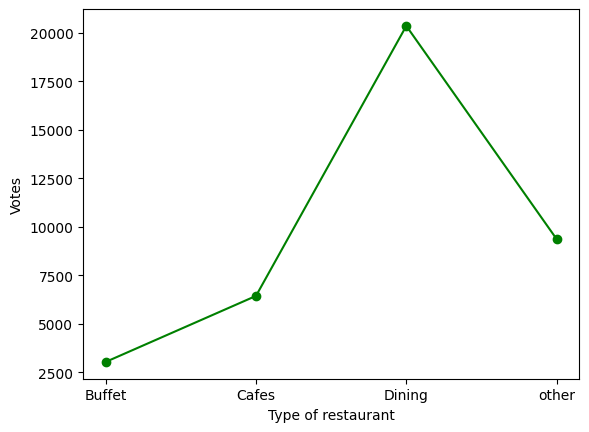

In [44]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

The restaurant with the highest votes is : 38    Empire Restaurant
Name: name, dtype: object  and the total vote is: 4884


C:\Users\HP\AppData\Local\Temp\ipykernel_14132\1789662095.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order',data=df,palette=colors)


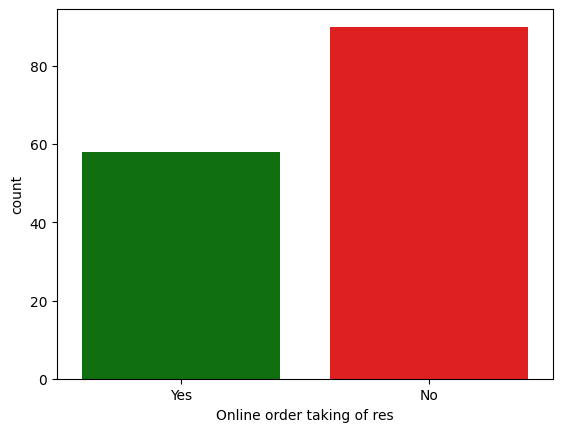

In [ ]:
#identifing the most voted restaurant type
max_votes = df['votes'].max()
res_with_max_votes = df.loc[df['votes'] == max_votes,'name']
print("The restaurant with the highest votes is :",res_with_max_votes ," and the total vote is:",max_votes)

#now lets check the online_order res take
colors = ['green','red'] #since the number is ethier yes or no
sns.countplot(x='online_order',data=df,palette=colors)
plt.xlabel("Online order taking of res")
plt.show()